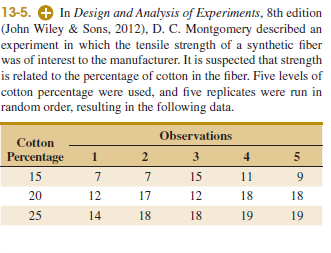
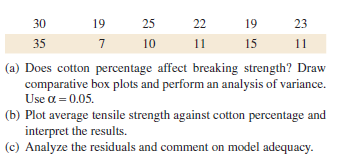

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import seaborn as sns
import pandas as pd

In [117]:
df = pd.read_excel("katoen.xlsx")
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=df.columns)
a=5
n=5

In [118]:
df_melt.columns = ["index", "treatment", "value"]
df_melt

,index,treatment,value
0,0,15%,7
1,1,15%,7
2,2,15%,15
3,3,15%,11
4,4,15%,9
5,0,20%,12
6,1,20%,17
7,2,20%,12
8,3,20%,18
9,4,20%,18


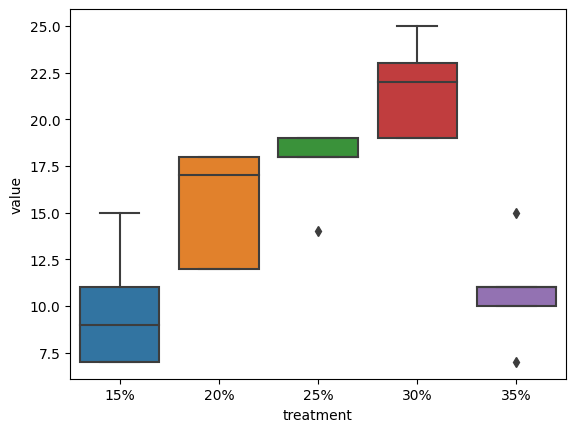

In [119]:
fig = plt.figure()
ax = sns.boxplot(data=df_melt, x='treatment', y='value')
plt.show()

# Hoe moet ik in godsnaam deze boxplot interpreteren?

In eerste oogopslag lijkt het katoen-gehalte invloed te hebben op de sterkte van de fiber.

In [120]:
# ANOVA

model = ols('value~treatment', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
treatment,475.76,4.0,14.756824,0.000009
Residual,161.20,20.0,NaN,NaN


In [121]:
pvalue = anova_table["PR(>F)"]['treatment']

if pvalue < 0.05:
    print("H0 rejected: there seems to be a significant difference among the treatments.")

else:
    print("H0 accepted: there does not seem te bo a significant difference among the treatments.")

H0 rejected: there seems to be a significant difference among the treatments.


Nulhypothese wordt dus volgens ANOVA afgewezen, dus er lijkt een significant verschil tussen de treatments te zijn.

In [122]:
perc = [15, 20, 25, 30, 35]
means = []

for col in df.columns:
    mean = df[col].values.mean()
    means.append(mean)
means
df_melt["means"] = np.repeat(means,5)

In [123]:
sse = anova_table["sum_sq"]["Residual"]
mse = sse/(a*(n-1))
t_crit = stats.t.ppf(q=0.975, df=15)
t_crit

lsd = t_crit*np.sqrt(2*mse/n)
lsd

3.827124348752533

# LSD test

In [124]:
i = 0

while i < len(means)-1:
    for j in range(i+1, len(means)):
        diff= np.abs(means[i]-means[j])
        if diff > lsd:
            print("%i-%i: SIGNIFICANT DIFFERENCE!" %((i+1),(j+1)))
        else:
            print("%i-%i: no significant difference " %(i+1,j+1))
    i+=1

1-2: SIGNIFICANT DIFFERENCE!
1-3: SIGNIFICANT DIFFERENCE!
1-4: SIGNIFICANT DIFFERENCE!
1-5: no significant difference 
2-3: no significant difference 
2-4: SIGNIFICANT DIFFERENCE!
2-5: SIGNIFICANT DIFFERENCE!
3-4: SIGNIFICANT DIFFERENCE!
3-5: SIGNIFICANT DIFFERENCE!
4-5: SIGNIFICANT DIFFERENCE!


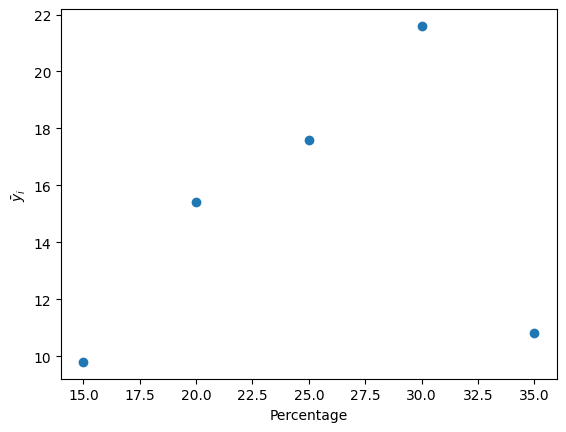

In [125]:
fig, ax = plt.subplots(1,1)
ax.scatter(perc, means)
ax.set_xlabel("Percentage")
ax.set_ylabel(r"$\bar{y}_i$")
plt.show()

In [126]:
residual = model.resid
residual
df_melt["residuals"]=residual
df_melt

,index,treatment,value,means,residuals
0,0,15%,7,9.8,-2.8
1,1,15%,7,9.8,-2.8
2,2,15%,15,9.8,5.2
3,3,15%,11,9.8,1.2
4,4,15%,9,9.8,-0.8
5,0,20%,12,15.4,-3.4
6,1,20%,17,15.4,1.6
7,2,20%,12,15.4,-3.4
8,3,20%,18,15.4,2.6
9,4,20%,18,15.4,2.6


Text(0, 0.5, 'Residual')

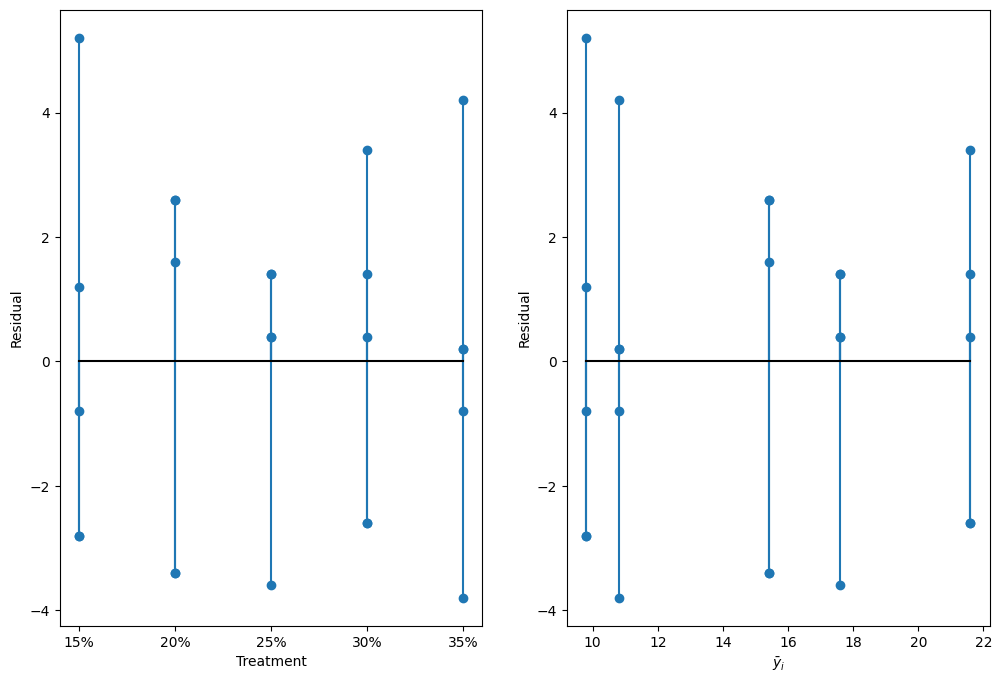

In [127]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax[0].stem(df_melt['treatment'], df_melt['residuals'], basefmt='k')
ax[0].set_xlabel('Treatment')
ax[0].set_ylabel('Residual')
ax[1].stem(df_melt['means'], df_melt['residuals'], basefmt='k')
ax[1].set_xlabel(r"$\bar{y}_i$")
ax[1].set_ylabel('Residual')

# Geen idee wat deze grafieken aangeven

In [153]:
residuals = df_melt['residuals'].values.tolist()
residuals.sort()
residuals = np.round(residuals,2)
residuals
ind = [1]

for i in range(1, len(residuals)):
    if residuals[i] == residuals[i-1]:
        ind.append(ind[i-1])
    else:
        ind.append(i+1)

ind
chance = [(i-0.5)/len(residuals) for i in ind]
z = stats.zscore(chance)
residuals = np.transpose(residuals)
residuals = residuals[:,np.newaxis]
az = np.linalg.lstsq(residuals, z)

C:\Users\lteeg\AppData\Local\Temp\ipykernel_19488\274975652.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  az = np.linalg.lstsq(residuals, z)


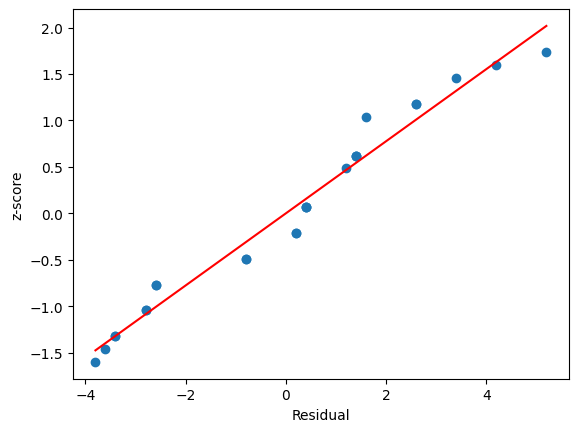

In [135]:
fig, ax1 = plt.subplots(1,1)
ax1.plot(residuals, az[0]*residuals, 'r')
ax1.scatter(residuals, z)
ax1.set_ylabel('z-score')
ax1.set_xlabel('Residual')
plt.show()